Reference: https://swcarpentry.github.io/python-novice-inflammation/01-numpy/

In [1]:
# System Time
import time
time.ctime()

'Sat Jan 19 19:23:24 2019'

## Numpy

In [2]:
import numpy as np

In [3]:
# Loading data from csv
data = np.loadtxt(fname="./inflammation-01.csv", delimiter=",")

In [4]:
# data currently refers to an N-dimensional array,
type(data)

numpy.ndarray

In [5]:
# Data type
data.dtype

dtype('float64')

In [6]:
# array contains 60 rows and 40 columns
data.shape

(60, 40)

In [7]:
print("First value in data: ", data[0, 0])
print("Middle value in data: ", data[30, 20])

First value in data:  0.0
Middle value in data:  13.0


In [8]:
# Slicing
# 0:4 => 0,1,2 and 3
# 5:10 => starts from 5 but not including 10
print(data[0:4, 0:10])
print(data[5:10, 0:10])
# if not include lower or upper bound, python uses 0 by default
print(data[:3, 36:])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]
[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


In [9]:
# numpy performs operations on arrays element-by-elements
print("original: ", data[:3, 36:])
print("double: ", (data * 2.0)[:3, 36:])
print("triple: ", (data * 2.0 + data)[:3, 36:])

original:  [[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]
double:  [[4. 6. 0. 0.]
 [2. 2. 0. 2.]
 [4. 4. 2. 2.]]
triple:  [[6. 9. 0. 0.]
 [3. 3. 0. 3.]
 [6. 6. 3. 3.]]


In [10]:
# Mean, max, min, standard deviation
mean, max, min, std = np.mean(data), np.max(data), np.min(data), np.std(data)
mean, max, min, std

(6.14875, 20.0, 0.0, 4.613833197118566)

In [11]:
# 0 on the first axis (rows), everything on the second (columns)
patient_0 = data[0, :]
print("maximum inflamation for patient 0: ", np.max(patient_0))
print("maximum inflamation for patient 2: ", np.max(data[2, :]))

maximum inflamation for patient 0:  18.0
maximum inflamation for patient 2:  19.0


In [12]:
# Perform the operation across an axis
np.mean(data, axis=0)

array([ 0.        ,  0.45      ,  1.11666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.9       ,  8.35      ,  7.73333333,  8.36666667,
        9.5       ,  9.58333333, 10.63333333, 11.56666667, 12.35      ,
       13.25      , 11.96666667, 11.03333333, 10.16666667, 10.        ,
        8.66666667,  9.15      ,  7.25      ,  7.33333333,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

## Visualization

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

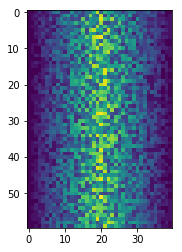

In [14]:
# heat map
image = plt.imshow(data)
plt.show()

Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, inflammation rises and falls over a 40-day period.

#### Average inflammation over time:

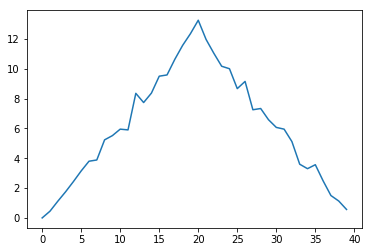

In [15]:
avg_imflammation = np.mean(data, axis=0)
avg_plot = plt.plot(avg_imflammation)
plt.show()

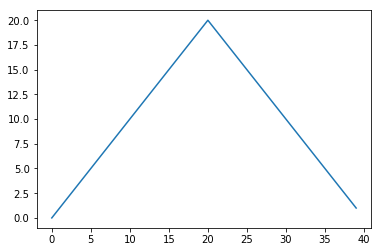

In [16]:
max_plot = plt.plot(np.max(data, axis=0))
plt.show()

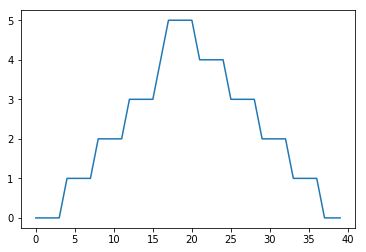

In [17]:
min_plot = plt.plot(np.min(data, axis=0))
plt.show()

### Grouping Plots

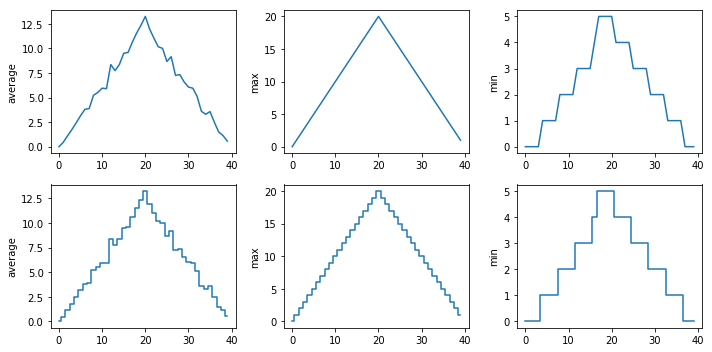

In [20]:
fig = plt.figure(figsize=(10.0, 5.0))

axes11 = fig.add_subplot(2,3,1)
axes12 = fig.add_subplot(2,3,2)
axes13 = fig.add_subplot(2,3,3)

axes21 = fig.add_subplot(2,3,4)
axes22 = fig.add_subplot(2,3,5)
axes23 = fig.add_subplot(2,3,6)

axes11.set_ylabel('average')
axes11.plot(np.mean(data, axis=0))
axes21.set_ylabel('average')
axes21.plot(np.mean(data, axis=0), drawstyle='steps-mid')

axes12.set_ylabel('max')
axes12.plot(np.max(data, axis=0))
axes22.set_ylabel('max')
axes22.plot(np.max(data, axis=0), drawstyle='steps-mid')

axes13.set_ylabel('min')
axes13.plot(np.min(data, axis=0))
axes23.set_ylabel('min')
axes23.plot(np.min(data, axis=0), drawstyle='steps-mid')

fig.tight_layout()
plt.show()